# importing

In [72]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import datetime
from pandas.plotting import lag_plot


from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set(style="darkgrid")

# CO2 concentration

In [73]:
co2_concentration_df = pd.read_csv('data/co2_concentration.csv')

In [74]:
co2_concentration_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24180 entries, 0 to 24179
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datenum           24180 non-null  int64  
 1   year              24180 non-null  int64  
 2   month             24180 non-null  int64  
 3   day               24180 non-null  int64  
 4   datetime          24180 non-null  object 
 5   data_mean_global  24180 non-null  float64
 6   data_mean_nh      24180 non-null  float64
 7   data_mean_sh      24180 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.5+ MB


In [75]:
co2_concentration_df.describe()

,datenum,year,month,day,data_mean_global,data_mean_nh,data_mean_sh
count,24180.000000,24180.000000,24180.000000,24180.0,24180.000000,24180.000000,24180.000000
mean,367981.278908,1007.000000,6.500000,15.0,282.609005,282.649649,282.568361
std,212458.753155,581.692353,3.452124,0.0,13.293774,13.697621,13.018358
min,15.000000,0.000000,1.000000,15.0,273.830262,271.497654,276.028855
25%,183997.500000,503.000000,3.750000,15.0,278.019756,277.614363,278.058685
50%,367980.000000,1007.000000,6.500000,15.0,279.807560,280.284309,279.414571
75%,551962.750000,1511.000000,9.250000,15.0,281.964426,282.660256,281.791037
max,735948.000000,2014.000000,12.000000,15.0,399.179692,403.127557,396.164296


In [76]:
co2_concentration_df.dtypes

datenum               int64
year                  int64
month                 int64
day                   int64
datetime             object
data_mean_global    float64
data_mean_nh        float64
data_mean_sh        float64
dtype: object

In [77]:
co2_concentration_df.head(3)

,datenum,year,month,day,datetime,data_mean_global,data_mean_nh,data_mean_sh
0,15,0,1,15,15-Jan-0000 00:00:00,278.366439,279.045659,277.687219
1,46,0,2,15,15-Feb-0000 00:00:00,278.713058,279.665398,277.760718
2,75,0,3,15,15-Mar-0000 00:00:00,279.013835,280.266779,277.760892


### missing data

In [78]:
co2_concentration_df.isnull().sum()

datenum             0
year                0
month               0
day                 0
datetime            0
data_mean_global    0
data_mean_nh        0
data_mean_sh        0
dtype: int64

In [79]:
co2_concentration_df.isnull().mean()

datenum             0.0
year                0.0
month               0.0
day                 0.0
datetime            0.0
data_mean_global    0.0
data_mean_nh        0.0
data_mean_sh        0.0
dtype: float64

In [80]:
co2_concentration_df['datetime'] = pd.to_datetime(co2_concentration_df['datetime'], errors = 'coerce', format='%d-%b-%Y %H:%M:%S')

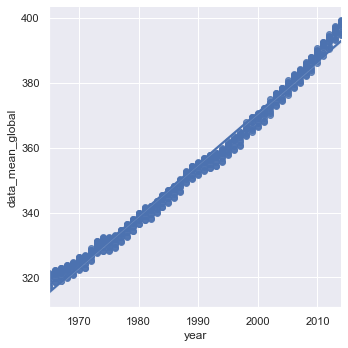

In [81]:
sns.lmplot(x='year', y='data_mean_global', data=co2_concentration_df.tail(600))

In [82]:
co2_data = co2_concentration_df.iloc[:, [1, -1,-2,-3]]

In [83]:
co2_data = co2_data[co2_data['year'] >= 1750]

In [84]:
co2_data.set_index('year', inplace=True)

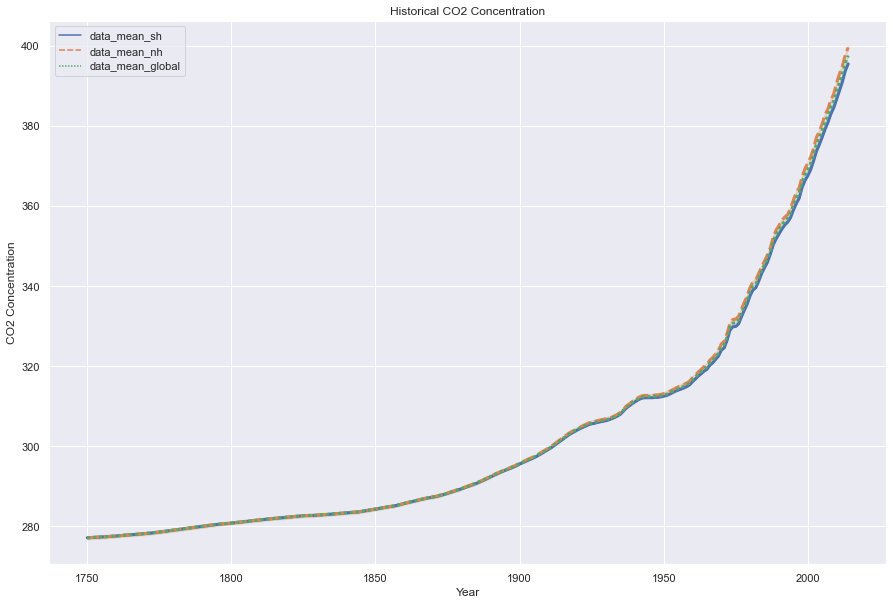

In [60]:
plt.subplots(figsize=(15,10))

plt.title('Historical CO2 Concentration')

ax = sns.lineplot(data=co2_data,ci=40, lw=3)

ax.set(xlabel='Year', ylabel='CO2 Concentration')

plt.savefig('co2_historical.pdf')

plt.show()

## autocorr

In [97]:
co2_data['data_mean_global'].autocorr(lag=2)

0.9984341541455618

In [98]:
co2_data['data_mean_global'].autocorr(lag=3)

0.9971932516722386

In [99]:
co2_data['data_mean_global'].autocorr(lag=12)

0.9999442567430057

In [95]:
co2_data['data_mean_global'].autocorr()

0.9995448789210795

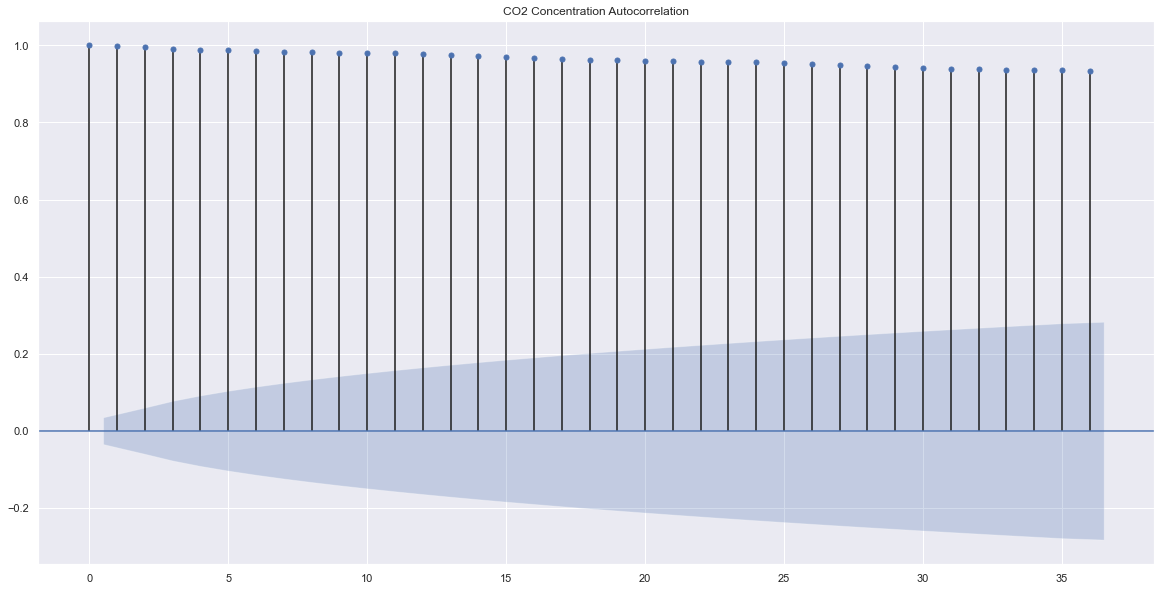

In [61]:
fig, ax = plt.subplots(figsize=(20,10))

ax = plot_acf(co2_data['data_mean_global'], ax, title='CO2 Concentration Autocorrelation')

plt.savefig('co2_autocorr.pdf')

plt.show()

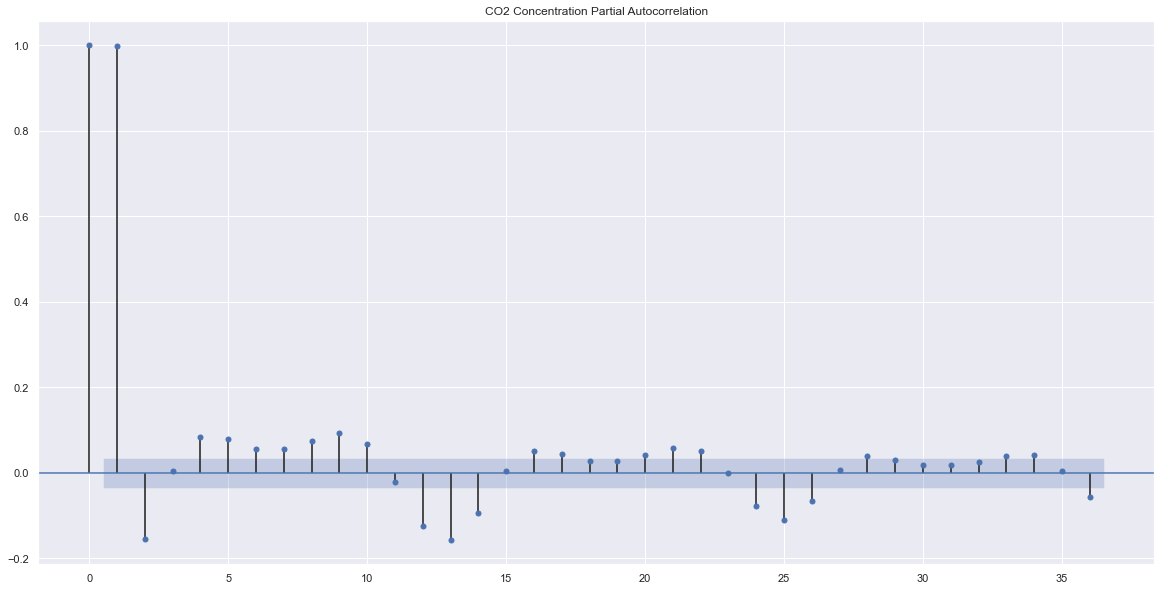

In [101]:
fig, ax = plt.subplots(figsize=(20,10))

ax = plot_pacf(co2_data['data_mean_global'], ax, title='CO2 Concentration Partial Autocorrelation')

plt.savefig('co2_partial_autocorr.pdf')

plt.show()

## decomposing time series

In [85]:
co2_concentration_df = co2_concentration_df[co2_concentration_df['datetime'].notnull()]

In [88]:
co2_concentration_df.set_index('datetime', inplace=True)

In [89]:
co2_concentration_df.index

DatetimeIndex(['1677-10-15', '1677-11-15', '1677-12-15', '1678-01-15',
               '1678-02-15', '1678-03-15', '1678-04-15', '1678-05-15',
               '1678-06-15', '1678-07-15',
               ...
               '2014-03-15', '2014-04-15', '2014-05-15', '2014-06-15',
               '2014-07-15', '2014-08-15', '2014-09-15', '2014-10-15',
               '2014-11-15', '2014-12-15'],
              dtype='datetime64[ns]', name='datetime', length=4047, freq=None)

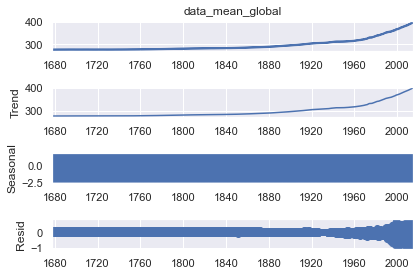

In [90]:
s_decomp = seasonal_decompose(co2_concentration_df['data_mean_global'], model='additive', period=12)
s_decomp.plot()
plt.show()

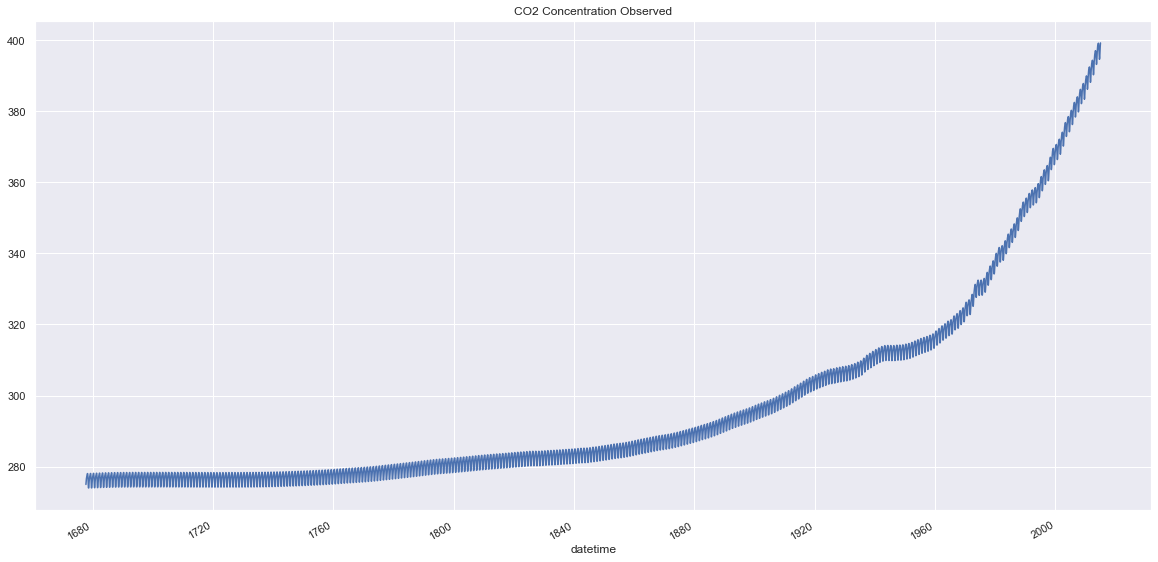

In [66]:
plt.subplots(figsize=(20,10))
plt.title('CO2 Concentration Observed')

plt.savefig('co2_decomp_observed.pdf')


s_decomp.observed.plot()
plt.show()

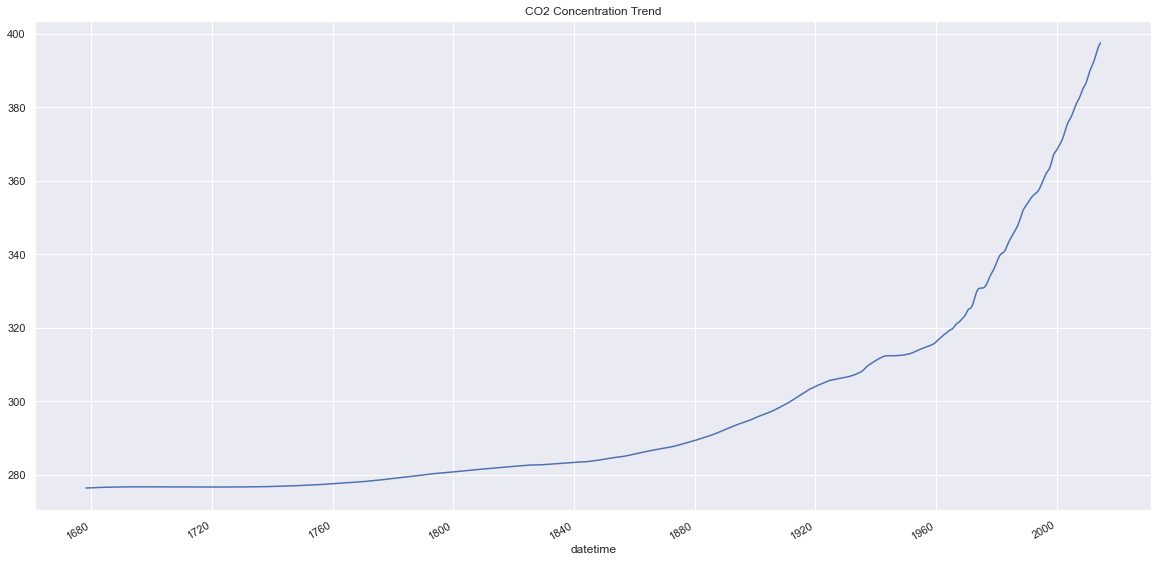

In [67]:
plt.subplots(figsize=(20,10))
plt.title('CO2 Concentration Trend')

plt.savefig('co2_decomp_trend.pdf')

s_decomp.trend.plot()
plt.show()

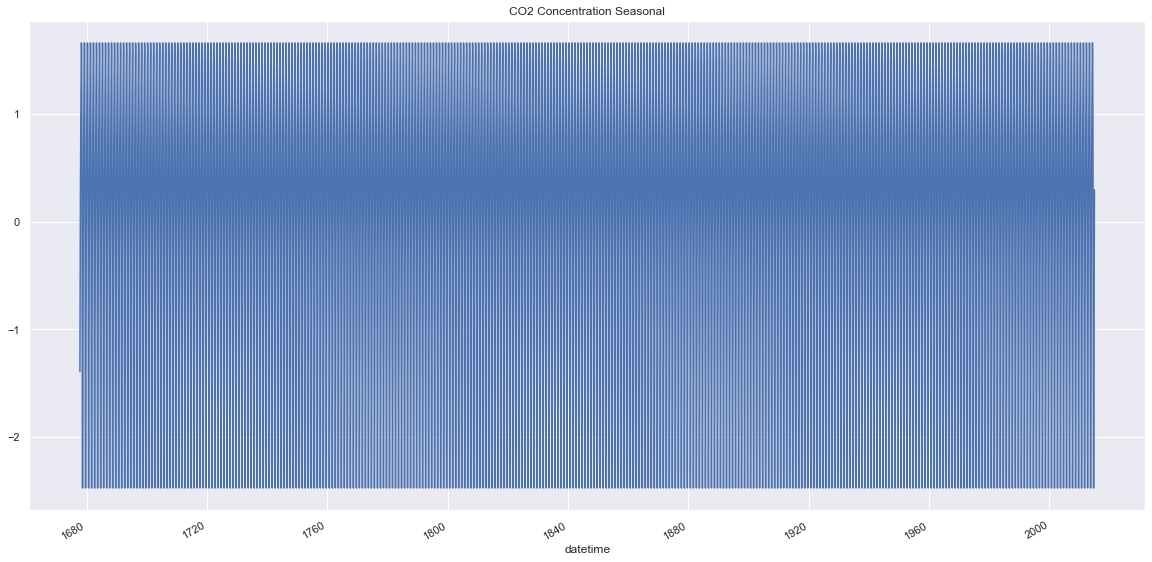

In [68]:
plt.subplots(figsize=(20,10))
plt.title('CO2 Concentration Seasonal')

plt.savefig('co2_decomp_season.pdf')

s_decomp.seasonal.plot()
plt.show()

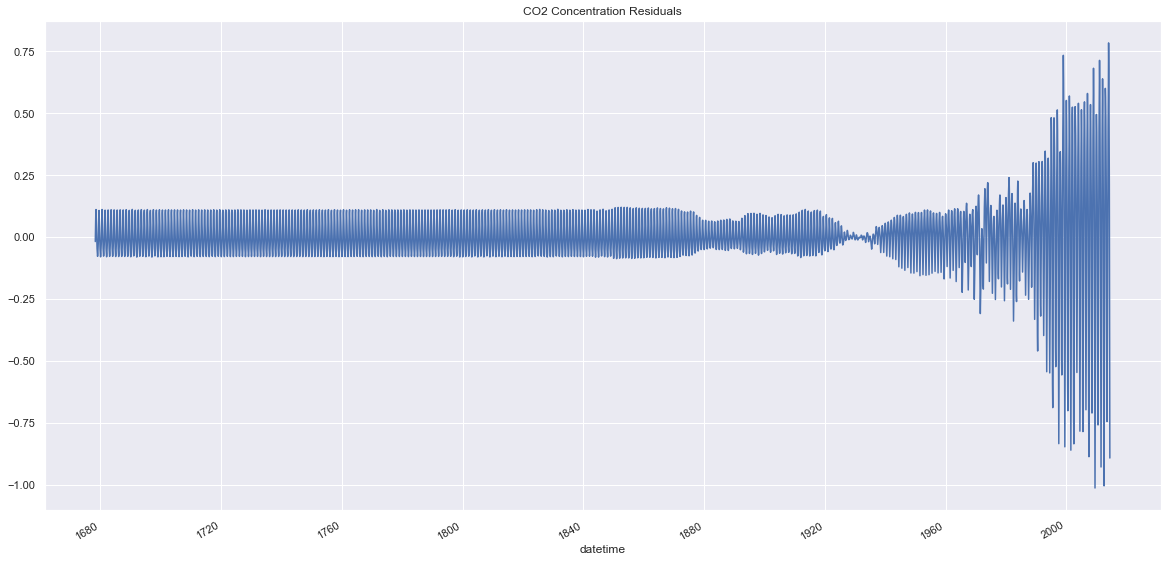

In [69]:
plt.subplots(figsize=(20,10))
plt.title('CO2 Concentration Residuals')

plt.savefig('co2_decomp_resid.pdf')


s_decomp.resid.plot()
plt.show()

In [93]:
co2_concentration_df

,datenum,year,month,day,data_mean_global,data_mean_nh,data_mean_sh
datetime,,,,,,,
1677-10-15,612801,1677,10,15,275.003582,273.839462,276.167702
1677-11-15,612832,1677,11,15,276.008147,275.718717,276.297577
1677-12-15,612862,1677,12,15,276.645443,276.961625,276.329261
1678-01-15,612893,1678,1,15,277.105917,277.785137,276.426697
1678-02-15,612924,1678,2,15,277.488981,278.441322,276.536641
...,...,...,...,...,...,...,...
2014-08-15,735826,2014,8,15,394.573461,393.376544,395.770379
2014-09-15,735857,2014,9,15,395.026810,394.318661,395.734959
2014-10-15,735887,2014,10,15,396.668760,397.456653,395.880867


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


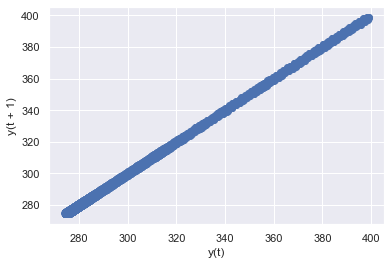

In [94]:
lag_plot(co2_concentration_df.loc[:, 'data_mean_global'])
plt.show()

In [71]:
co2_concentration_df = co2_concentration_df['data_mean_global']

In [31]:
co2_concentration_df.to_csv('data/co2_concentration_df.csv')

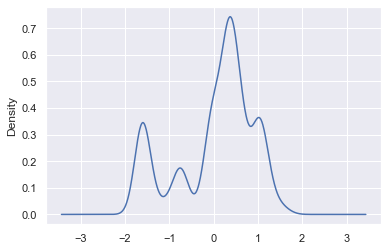

In [102]:
co2_data['data_mean_global'].diff(1).plot(kind='kde')


In [103]:
co2_data['data_mean_global'].diff(1).describe()

count    3179.000000
mean        0.038177
std         0.875392
min        -1.715736
25%        -0.569266
50%         0.314339
75%         0.639078
max         1.718394
Name: data_mean_global, dtype: float64

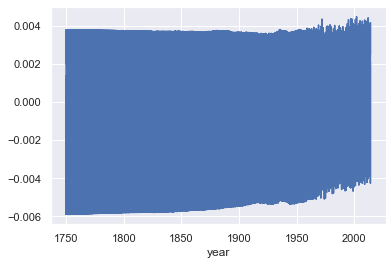

In [104]:
co2_data['data_mean_global'].pct_change().plot()

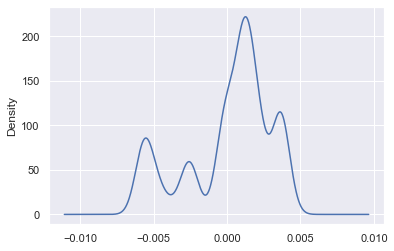

In [105]:
co2_data['data_mean_global'].pct_change().plot(kind='kde')

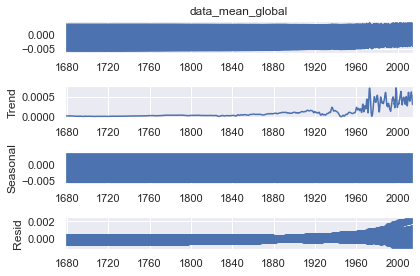

In [110]:
s_decomp = seasonal_decompose(co2_concentration_df['data_mean_global'].pct_change().dropna(inplace=False), model='additive', period=12)
s_decomp.plot()
plt.show()

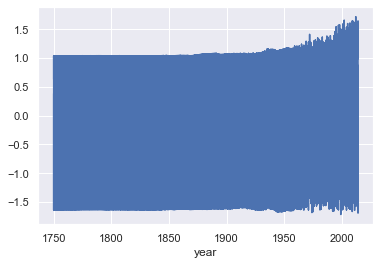

In [106]:
co2_data['data_mean_global'].diff(1).plot()

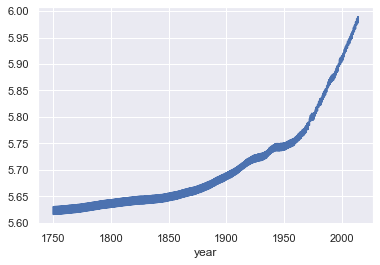

In [109]:
np.log(co2_data['data_mean_global']).plot()

In [40]:
np.log(co2_data['data_mean_global']).describe()

count    3180.000000
mean        5.708285
std         0.090066
min         5.615729
25%         5.641668
50%         5.670173
75%         5.746544
max         5.989412
Name: data_mean_global, dtype: float64

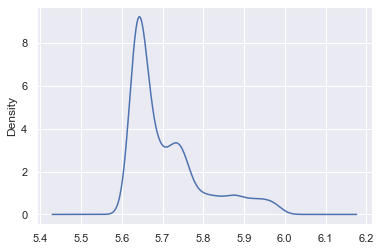

In [41]:
np.log(co2_data['data_mean_global']).plot(kind='kde')